Authors:
*   Arnas Juravicius - 18257305
*   Dylan Kearney - 18227023
*   Oisin McNamara - 18237398
*   Cyiaph McCann - 17233453






Yes the code executes to the end without an error

References used when implement DQN Agent:
https://www.youtube.com/watch?v=hCeJeq8U0lo

https://medium.com/@madeshselvarani/how-to-solve-atari-games-with-keras-rl2-part-1-2020-50c0ebfba777

https://medium.com/@madeshselvarani/how-to-solve-atari-games-with-keras-rl2-part-2-2020-12311caf4fd

# 0. Install Dependencies

In [1]:
import urllib.request
urllib.request.urlretrieve('http://www.atarimania.com/roms/Roms.rar','Roms.rar')
!pip install unrar
!unrar x Roms.rar
!mkdir rars
!mv HC\ ROMS.zip   rars
!mv ROMS.zip  rars
!python -m atari_py.import_roms rars


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from Roms.rar

Extracting  HC ROMS.zip                                                   36%  OK 
Extracting  ROMS.zip                                                      74% 99%  OK 
All OK
copying adventure.bin from HC ROMS/BY ALPHABET (PAL)/A-G/Adventure (PAL).bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/adventure.bin
copying air_raid.bin from HC ROMS/BY ALPHABET (PAL)/A-G/Air Raid (PAL).bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/air_raid.bin
copying alien.bin from HC ROMS/BY ALPHABET (PAL)/A-G/REMAINING NTSC ORIGINALS/Alien.bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/alien.bin
copying crazy_climber.bin from HC ROMS/BY ALPHABET (PAL)/A-G/REMAINING NTSC ORIGINALS/Crazy Climber.bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/crazy_climber.bin
copying elevator_action.bin from HC ROMS/BY ALPHABET (PAL)/

In [2]:
!pip install tensorflow==2.3.1 gym keras-rl2 gym[atari]

     |████████████████████████████████| 320.4 MB 23 kB/s 
     |████████████████████████████████| 52 kB 764 kB/s 
     |████████████████████████████████| 20.1 MB 1.2 MB/s 
     |████████████████████████████████| 459 kB 31.9 MB/s 
     |████████████████████████████████| 2.9 MB 32.9 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorflow
    Found existing installatio

In [3]:
!apt-get install x11-utils > /dev/null 2>&1 
!pip install pyglet > /dev/null 2>&1 
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1

# 1. Test Random Environment with OpenAI Gym

In [4]:
# Imports needed
import gym
import random
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
import gym
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Here we create a new enviroment using gym make function
# Asteroids is our game of choice, this can be changed easily to any atari game
env = gym.make('Asteroids-v0')
# We get the height, width and channels from the observation space of the game enviroment
height, width, channels = env.observation_space.shape
# We get the joystick actions from the action space of the game enviroment
actions = env.action_space.n

In [ ]:
# Here we print out all the possible actions
env.unwrapped.get_action_meanings()

['NOOP',
 'FIRE',
 'UP',
 'RIGHT',
 'LEFT',
 'DOWN',
 'UPRIGHT',
 'UPLEFT',
 'UPFIRE',
 'RIGHTFIRE',
 'LEFTFIRE',
 'DOWNFIRE',
 'UPRIGHTFIRE',
 'UPLEFTFIRE']

In [ ]:
# Take 10 episodes
episodes = 10
# Reset this variable everytime we run this
totalScore = 0
# Add the scores to an array to use for plotting
beforeTrainingScores = []
# Loop through the number of epsidoes
for episode in range(1, episodes+1):
    # We reset the state one each episode
    state = env.reset()
    # We set done to False at each episode
    done = False
    # The episodes score is set to zero
    score = 0 
    
    # While done is equal to False
    while not done:
        # Get a random action from the set of choices, each number represents the enviroment actions
        action = random.choice([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
        # Save the reward from the action
        n_state, reward, done, info = env.step(action)
        # Add the reward to score for the episode
        score += reward
    # Print out the epsiode score
    print('Episode:{} Score:{}'.format(episode, score))
    # Add the episode score to the array for plotting
    beforeTrainingScores.append(score)
    # Total score is used to get the average
    totalScore += score
# Close the enviroment
env.close()
# Print the average score
print(totalScore / episodes)

Episode:1 Score:330.0
Episode:2 Score:680.0
Episode:3 Score:330.0
Episode:4 Score:1280.0
Episode:5 Score:560.0
Episode:6 Score:380.0
Episode:7 Score:630.0
Episode:8 Score:430.0
Episode:9 Score:1300.0
Episode:10 Score:1180.0
710.0


Episode:0 Score:880.0


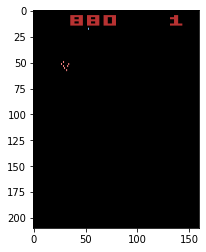

In [6]:
# DO the same as above but only for one episode
# We do this to actually render a game enviroment in colab
# Only call this once
img = plt.imshow(env.render(mode='rgb_array'))
for episode in range(1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        img.set_data(env.render(mode='rgb_array')) # just update the data
        display.display(plt.gcf())
        display.clear_output(wait=True)
        screen = env.render(mode='rgb_array')
        action = random.choice([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
    done = True
env.close()

# 2. Create a Deep Learning Model with Keras

In [ ]:
# Imports needed for the model and keras rl
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Convolution2D
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from rl.agents import DQNAgent
from rl.memory import SequentialMemory
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy
from rl.core import Processor
from PIL import Image
from rl.core import Processor

In [ ]:
# Here we build the model passing in the number of actions
def build_model(actions):
    # We intialize the HeNormal weight intializier
    weights = tf.keras.initializers.HeNormal()
    # Build a sequential model
    model = Sequential()
    # Add the first layer
    model.add(Convolution2D(32, (8,8), strides=(4,4), activation='relu', input_shape=(3, 84, 84, 1), kernel_initializer=weights))
    # Add a second layer
    model.add(Convolution2D(64, (4,4), strides=(2,2), activation='relu', kernel_initializer=weights))
    # Add a third layer
    model.add(Convolution2D(64, (3,3), activation='relu', kernel_initializer=weights))
    # Flatten the three layers
    model.add(Flatten())
    # Add a dense layer
    model.add(Dense(512, activation='relu', kernel_initializer=weights))
    # Add another dense layer
    model.add(Dense(256, activation='relu', kernel_initializer=weights))
    # Add an output layer
    model.add(Dense(actions, activation='linear'))
    # Finally we return the model
    return model


In [ ]:
# We build the model using the number of actions in the game enviroment
model = build_model(actions)

In [ ]:
# Here we print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 3, 20, 20, 32)     2080      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 9, 9, 64)       32832     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 7, 7, 64)       36928     
_________________________________________________________________
flatten (Flatten)            (None, 9408)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4817408   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 14)                3

In [ ]:
# We inherit from the keras.rl Processor
# This is used to preprocess the images
class AtariProcessor(Processor):
    def process_observation(self, observation):
        # Do a check
        assert observation.ndim == 3  # (height, width, channel)
        # First we crop the image leaving only the useful information
        observation = observation[20:195]
        # We create an image from the Image library
        img = Image.fromarray(observation)
        # We resize our image to 84 by 84 and convert the image to gray scale
        img = img.resize((84,84)).convert('L')
        # We convert the image back to a numpy array
        processed_observation = np.array(img)
        processed_observation = np.expand_dims(processed_observation, axis=-1)
        # We return the image
        return processed_observation.astype('uint8')  # saves storage in experience memory

# 3. Build Agent with Keras-RL

In [ ]:
# Here we inialize the Atari processor
processor = AtariProcessor()
# Here we build the agent using the model and actions
def build_agent(model, actions):
    # Here we create the policy for our agent
    policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., value_min=.1, value_test=.2, nb_steps=10000)
    # This is the memory for the agent
    memory = SequentialMemory(limit=50000, window_length=3)
    # Here we create the DQN agent using things like the model, processor and policy
    dqn = DQNAgent(model=model, processor=processor, memory=memory, policy=policy,
                  enable_dueling_network=True, dueling_type='avg', 
                   nb_actions=actions, nb_steps_warmup=1000
                  )
    # Return the DQN agent
    return dqn

In [ ]:
# Here we build the DQN agent
dqn = build_agent(model, actions)
# We compile the agent using Adam as the optimizer
dqn.compile(Adam(learning_rate=0.0001))

In [ ]:
# Finally, we fit out game enviroment to the DQN agent
dqn.fit(env, nb_steps=10000, visualize=False, verbose=1)

Training for 10000 steps ...
Interval 1 (0 steps performed)
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
10000/10000 [==============================] - 2284s 228ms/step - reward: 0.6590
done, took 2283.794 seconds


In [ ]:
# Here we test our DQN agent
scores = dqn.test(env, nb_episodes=10, visualize=False)
print(np.mean(scores.history['episode_reward']))

Testing for 10 episodes ...
Episode 1: reward: 1440.000, steps: 1853
Episode 2: reward: 1320.000, steps: 2175
Episode 3: reward: 2000.000, steps: 3653
Episode 4: reward: 1460.000, steps: 1778
Episode 5: reward: 1080.000, steps: 1272
Episode 6: reward: 780.000, steps: 862
Episode 7: reward: 830.000, steps: 762
Episode 8: reward: 580.000, steps: 1025
Episode 9: reward: 1650.000, steps: 2018
Episode 10: reward: 1130.000, steps: 1488
1227.0


# 4. Plotting rewards over Episodes

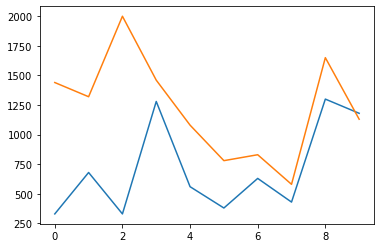

In [ ]:
# Here we plot the rewards of the random actions vs the trained model
# Random actions in blue
plt.plot(beforeTrainingScores)
# The trained model in orange
plt.plot(scores.history['episode_reward'])
plt.show()

In [ ]:
dqn.save_weights('Weights')

In [ ]:
# We need this to fix an error if we get one when building the model
del model

In [ ]:
del dqn